In [9]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

20.1 ms ± 2.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


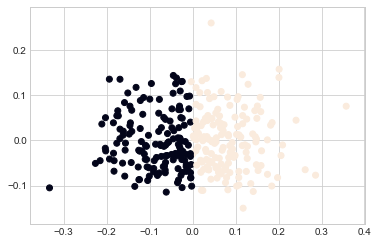

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [20]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
%timeit y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
sns.set_style('whitegrid')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [19]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
%timeit minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

6.94 ms ± 421 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        0  152
1      149    2


In [22]:
clusters = [2, 4, 6, 10, 20, 40]
for cluster in clusters:
    print('{} clusters for KMeans:'.format(cluster))
    %timeit y_pred = KMeans(n_clusters=cluster, random_state=42).fit_predict(X_pca)
    print(pd.crosstab(y_pred, y))

print('-'*40)
for cluster in clusters:
    print('{} clusters for Mini Batch Means:'.format(cluster))
    %timeit y_pred = MiniBatchKMeans(init='random', n_clusters=cluster, batch_size=200).fit_predict(X_pca)
    print(pd.crosstab(y_pred, y))

2 clusters for KMeans:
19.9 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
col_0   0   1
row_0        
0      84  65
1      55  99
4 clusters for KMeans:
45.5 ms ± 4.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
col_0   0   1
row_0        
0      84  65
1      55  99
6 clusters for KMeans:
34.9 ms ± 443 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
col_0   0   1
row_0        
0      84  65
1      55  99
10 clusters for KMeans:
47 ms ± 488 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
col_0   0   1
row_0        
0      84  65
1      55  99
20 clusters for KMeans:
73.3 ms ± 365 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
col_0   0   1
row_0        
0      84  65
1      55  99
40 clusters for KMeans:
110 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
col_0   0   1
row_0        
0      84  65
1      55  99
----------------------------------------
2 clusters for Mini Batch Means:
6.84 ms ± 258 µs per loop (m